In [1]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

In [1]:
pip install SHAP

  Obtaining dependency information for SHAP from https://files.pythonhosted.org/packages/e5/bb/dc75933de86e6076f58cf68325877be952a97a371c26b252013f1258a5a7/shap-0.47.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/544.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------- ----------- 389.1/544.4 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Load your dataset
df = pd.read_csv("descriptor.csv")  # Adjust path

In [3]:
df.head()

,SlogP_VSA5,BCUT2D_CHGHI,SMR_VSA5,MinEStateIndex,Chi4v,Prot_MW,Aromaticity,Instability,Hydropathy,IsoelectricPoint,Kd
0,24.165342,2.664828,30.853754,-4.476639,4.106426,112902.2098,0.114804,50.310725,-0.242095,5.480041,8.301030
1,54.576846,2.371979,68.584544,-4.340588,6.041933,58194.7117,0.071429,52.925502,-0.512741,8.875701,7.795880
2,11.126903,1.954279,0.000000,0.023478,1.492145,18402.3351,0.074534,33.732298,-0.610559,4.050028,3.614394
3,17.354804,2.445863,38.008294,-1.272533,3.272341,70897.2343,0.063467,36.887492,-0.456037,5.374718,6.530178
4,30.123369,2.041809,19.765380,-0.312038,1.071021,56848.2407,0.113590,33.652941,-0.199189,8.276016,5.886057


In [4]:
features = ['SlogP_VSA5', 'BCUT2D_CHGHI', 'SMR_VSA5', 'MinEStateIndex', 'Chi4v','Prot_MW', 'Aromaticity', 'Instability', 'Hydropathy','IsoelectricPoint']
target = 'Kd'

X = df[features]
y = df[target]


In [5]:
# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0, random_state=42))
])

In [7]:
xgb_pipeline.fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_val)

In [8]:
xgb_mse = mean_squared_error(y_val, xgb_preds)
print(f"Baseline XGBoost MSE: {xgb_mse:.4f}")

Baseline XGBoost MSE: 1.4729


In [9]:
joblib.dump(xgb_pipeline, "baseline_xgb_model.pkl")

['baseline_xgb_model.pkl']

In [10]:
test_df = pd.read_csv("descriptor_test.csv")
x_test = test_df.drop("Kd", axis=1)
y_test = test_df['Kd']

model = joblib.load("baseline_xgb_model.pkl")
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error , root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 1.4940
Mean Absolute Error: 0.9335
Root Mean Squared Error: 1.2223


C:\Users\NongNam\AppData\Local\Temp\ipykernel_40624\897430231.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="True Kd", shade=True)
C:\Users\NongNam\AppData\Local\Temp\ipykernel_40624\897430231.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted Kd", shade=True)


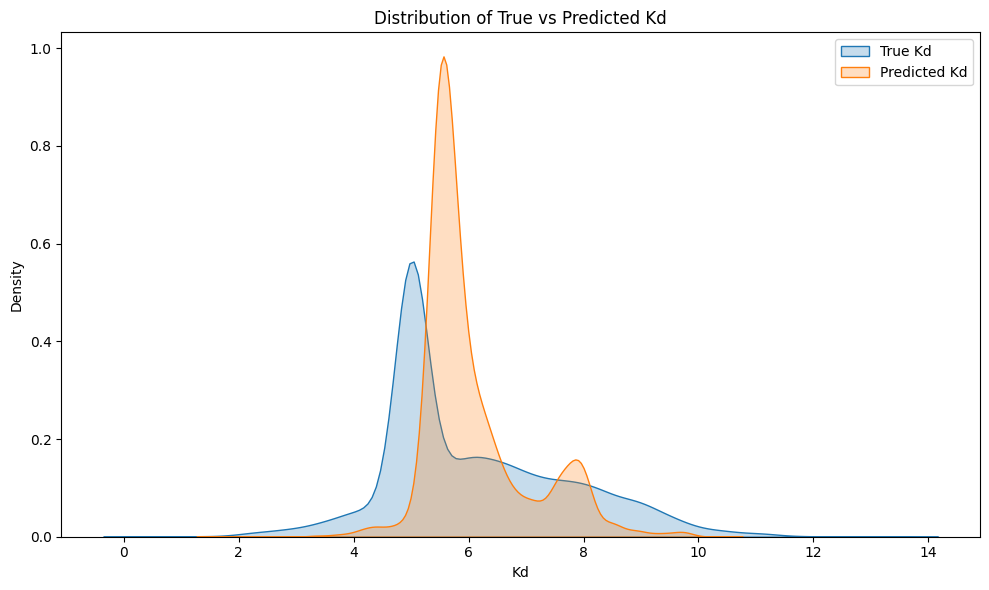

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot real vs predicted distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label="True Kd", shade=True)
sns.kdeplot(y_pred, label="Predicted Kd", shade=True)
plt.title("Distribution of True vs Predicted Kd")
plt.xlabel("Kd")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()